In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam
import tensorflow_probability as tfp
import tensorflow as tf

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


# Data Loading

In [3]:
# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = y_train % 2  # Convert labels to 0 (even) and 1 (odd) 
y_train_original = y_train.copy()  # {original labels} 
y_test = y_test % 2
y_test_original = y_test.copy()

# Mark a subset of positive instances as unlabeled
positive_indices = np.where(y_train == 1)[0]
unlabeled_indices = np.random.choice(positive_indices, size=int(len(positive_indices) * 0.8), replace=False)
y_train[unlabeled_indices] = 0  # Marking unlabeled now y_train is PU dataset


X = x_train  # Your feature matrix

# Preparing 's', the binary indicator vector
# Start by marking all instances as 'unlabeled' (0)
s = np.zeros_like(y_train)
# Then, mark the originally positive instances as 'labeled' (1), excluding those you've marked as unlabeled
s[positive_indices] = 1
s[unlabeled_indices] = 0 # where s=0 y can be either y=1 or y=0

print("Training labels distribution:", np.bincount(y_train))
print("Training original labels distribution:", np.bincount(y_train_original))

Training labels distribution: [53898  6102]
Training original labels distribution: [29492 30508]


n_epochs=300
for epoch = 1 to n_epochs do
    Suffel to create mini-batch 
    for each mini-bach do:
        pass (I'll call function here by my self)
    end for
    if (check to call update function) I want to run this every 3 epoch:
        update_policy()
    end if
end for

# Pre-training

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization

model_1 = Sequential([
    Conv2D(96, (3, 3), padding='same', input_shape=(28, 28, 1)),  # First convolutional layer with 96 filters
    Activation('relu'),
    Conv2D(192, (3, 3), padding='same'),  # Second convolutional layer with 192 filters
    Activation('relu'),
    Conv2D(10, (1, 1), padding='same'),  # Third convolutional layer with 10 filters
    Activation('relu'),
    Flatten(),
    Dense(100),  # Dense layer with 100 units
    Activation('relu'),
    Dense(100),  # Additional Dense layer to make it 6 layers in total
    Activation('relu'),
    Dense(1),  # Output layer for binary classification
    Activation('sigmoid')
])


model_1.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])
# history_1 = model_1.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
# model_1.save_weights('clf_model_.weights.h5')
model_1.load_weights('clf_model_.weights.h5')


C:\Users\FH-Deg\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.8619 - loss: 0.4027 - val_accuracy: 0.9001 - val_loss: 0.2910
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.8966 - loss: 0.2981 - val_accuracy: 0.9001 - val_loss: 0.2827
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.8980 - loss: 0.2867 - val_accuracy: 0.9001 - val_loss: 0.2763
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.8966 - loss: 0.2830 - val_accuracy: 0.9001 - val_loss: 0.2730
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.8972 - loss: 0.2777 - val_accuracy: 0.9001 - val_loss: 0.2699


### Probablistic outcome of classifer to pre-train policy network
 

In [5]:
probabilities = model_1.predict(x_train)
threshold = min(probabilities[y_train == 1])

# Convert probabilities to binary labels based on the threshold
predicted_labels = (probabilities >= threshold).astype(int)
clf_predicted_labels = predicted_labels.flatten().astype(int)

print("Classifer predicted labels distribution:", np.bincount(clf_predicted_labels))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step
Classifer predicted labels distribution: [ 8874 51126]


In [6]:
# Policy-Network Model

class PolicyGradientNetwork:
    def __init__(self):
        self.model = self._create_model()
    
    def _create_model(self):
        model = Sequential([
            Conv2D(96, (3, 3), padding='same', input_shape=(28, 28, 1)),
            Activation('relu'),
            Conv2D(10, (3, 3), padding='same'),
            Activation('relu'),
            Flatten(),
            Dense(100),
            Activation('relu'),
            Dense(100),  # Additional Dense layer
            Activation('relu'),
            Dense(1),  # Softmax output for binary classification
            Activation('sigmoid') # Hard labeling
        ])
        return model
    
    def get_model(self):
        return self.model
    

policy_network = PolicyGradientNetwork()
pn_model = policy_network.get_model()

pn_model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model with one-hot encoded labels
# history_2 = pn_model.fit(x_train, clf_predicted_labels, epochs=5, batch_size=32, validation_split=0.2)
# pn_model.save_weights('pn_model_.weights.h5')
pn_model.load_weights('pn_model_.weights.h5')

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8588 - loss: 0.3833 - val_accuracy: 0.9482 - val_loss: 0.1250
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9519 - loss: 0.1153 - val_accuracy: 0.9593 - val_loss: 0.1000
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9620 - loss: 0.0957 - val_accuracy: 0.9626 - val_loss: 0.0895
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9639 - loss: 0.0898 - val_accuracy: 0.9649 - val_loss: 0.0840
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9667 - loss: 0.0816 - val_accuracy: 0.9647 - val_loss: 0.0857


In [8]:
probabilities = pn_model.predict(x_train)
threshold = min(probabilities[y_train == 1])

# Convert probabilities to binary labels based on the threshold
predicted_labels = (probabilities >= threshold).astype(int)
np_predicted_labels = predicted_labels.flatten().astype(int)

print("Classifer predicted labels distribution:", np.bincount(np_predicted_labels))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step
Classifer predicted labels distribution: [ 4418 55582]


## Interactive learning

In [9]:
# import gym
# from gym import spaces
# import numpy as np

# class CustomEnv(gym.Env):
#     def __init__(self, x_train, labels, mnist_data, model, threshold=0.5):
#         super(CustomEnv, self).__init__()
#         # self.mnist_data = mnist_data
#         self.model = model
#         self.x_train=x_test
#         self.labels=labels
#         self.threshold = threshold
#         self.current_index = 0
        
#         self.action_space = spaces.Discrete(2)  # Actions: 0 or 1
#         self.observation_space = spaces.Box(low=0, high=255, shape=(28, 28, 1), dtype=np.uint8)

#     def step(self, action):
#         x_fv, label = self._get_next_instance()
#         # img, label = self._get_next_image()
        
#         predicted_prob = self.model.predict(x_fv)[0][0]
#         print(f"CustomEnv probability: {predicted_prob}")
#         predicted_label = 1 if predicted_prob >= self.threshold else 0
#         print(f"CustomEnv predicted_label: {predicted_label}")
        
#         # reward = self._get_reward(label, predicted_label, predicted_prob)
        
#         self.current_step += 1
#         done = self.current_step >= len(self.mnist_data)
        
#         # return img, reward, done, {}
#         # return x_fv, reward, done, {}
#         return x_fv, predicted_label, done, {}
    
#     def _get_next_instance(self):
#         # Ensure the current index is within the bounds of the dataset
#         if self.current_index < len(self.x_train):
#             x_fv = self.x_train[self.current_index]
#             label = self.labels[self.current_index]
#             self.current_index += 1  # Move to the next instance
#             return x_fv, label
#         else:
#             # Handle the end of the dataset; you might want to reset or take another action
#             return None, None

#     def reset(self):
#         self.current_step = 0
#         self.current_index=0
#         # return self._get_next_image()[0]
#         return self._get_next_instance()[0]

#     # def _get_next_image(self):
#     #     img, label = self.mnist_data[self.current_step]
#     #     return img, label

#     # def _get_reward(self, true_label, predicted_label, predicted_prob):
#     #     if predicted_label == 1 and true_label == 1:

#     #     if true_label == predicted_label:
#     #         return predicted_prob
#     #     else:
#     #         return 1 - predicted_prob
        
#     #     if predicted_label == 1 and true_label == 1:  # Fraud (positive class)
#     #         if y_hat >= 0.5:  # Predicted probability is greater than or equal to threshold
#     #             return self.y[self.current_index]
#     #         else:
#     #             return 1 - self.y[self.current_index]
#     #     else:  # Not-Fraud (negative class)
#     #         return self.y[self.current_index]

#     # def render(self, mode='human', close=False):
#     #     pass  # Add rendering logic if needed


In [10]:
# env = CustomEnv(x_train=x_train, labels=y_train, model=pn_model)
# # Create an instance of CustomEnv
# # env = CustomEnv(balanced_df)

# # Reset the environment to its initial state
# observation = env.reset()
# print(f"cust OBser: {observation}")

In [9]:
import tensorflow as tf
import numpy as np

class Agent:
    def __init__(self, model, target_model, alpha=0.00001, gamma=0.99):
        self.gamma = gamma  # Discount factor
        self.lr = alpha  # Learning rate
        self.model = model  # Policy model
        self.target_model = target_model # target policy model
        self.state_memory = []
        self.action_memory = []
        self.reward_memory = []

    
    def choose_action(self, states):
        # Convert states to float32 tensor within the function
        states = tf.convert_to_tensor(states, dtype=tf.float32)
        probabilities = self.target_model(states)  # Make sure target model expects float32 input
        action_sampler = tfp.distributions.Bernoulli(probs=probabilities, dtype=tf.float32)
        actions = action_sampler.sample()
        return actions.numpy(), probabilities.numpy()


    def store_transition(self, states, actions, rewards):
        self.state_memory.extend(states)
        self.action_memory.extend(actions)
        self.reward_memory.extend(rewards)

    def learn(self):
        actions = np.array(self.action_memory)
        rewards = np.array(self.reward_memory)
        states = np.array(self.state_memory)

        # Calculate discounted rewards
        G = np.zeros_like(rewards)
        for t in range(len(rewards)):
            G_sum = 0
            discount = 1
            for k in range(t, len(rewards)):
                G_sum += rewards[k] * discount
                discount *= self.gamma
            G[t] = G_sum

        # Updating policy
        with tf.GradientTape() as tape:
            loss = 0
            for idx, (g, state) in enumerate(zip(G, states)):
                state = tf.convert_to_tensor([state], dtype=tf.float32)
                probs = self.model(state, training=True)
                action_probs = tfp.distributions.Bernoulli(probs=probs)
                log_prob = action_probs.log_prob(actions[idx])
                loss += -g * tf.reduce_sum(log_prob)

        gradients = tape.gradient(loss, self.model.trainable_variables)
        self.model.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))

        # Clear memory
        self.state_memory = []
        self.action_memory = []
        self.reward_memory = []


In [10]:
# Clone policy model for stable target policy
target_policy_model = tf.keras.models.clone_model(pn_model)
target_policy_model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])


In [11]:
history = {
    'epoch_loss': [],
    'epoch_accuracy': [],
    'batch_loss': [],
    'batch_accuracy': [],
    'predictions': [],
    'rewards': [],
    'thresholds': []
}

agent = Agent(pn_model,target_model=target_policy_model, alpha=0.00001, gamma=0.99)
# Example parameters
n_epochs = 300
# n_epochs = 10
batch_size = 128 # You can adjust the batch size as needed

def shuffle_data(x_train, y_train, s):
    indices = np.arange(len(x_train))
    np.random.shuffle(indices)
    return x_train[indices], y_train[indices], s[indices]

def create_mini_batches(x_train, y_train, s, batch_size):
    for start_idx in range(0, len(x_train) - batch_size + 1, batch_size):
        excerpt = slice(start_idx, start_idx + batch_size)
        yield x_train[excerpt], y_train[excerpt], s[excerpt]

def calculate_threshold(clf_probabilities, y_batch):
    # Identify indices of positive examples
    positive_indices = (y_batch == 1)
    
    # Calculate threshmin from positive examples
    if np.any(positive_indices):
        threshmin = np.min(clf_probabilities[positive_indices])
    else:
        threshmin = 0  # Default value if no positive examples are present

    # Identify U0 - samples with predictions >= threshmin
    U0_indices = (clf_probabilities >= threshmin)
    
    # Calculate the final threshold using Equation 5
    if np.any(U0_indices):
        threshold = np.mean(clf_probabilities[U0_indices])
    else:
        threshold = threshmin  # Use threshmin if no samples meet the U0 criteria

    return threshold

def calculate_rewards(clf_probabilities, y_batch, threshold):
    # Reward calculation needs to consider whether predictions meet a certain threshold
    # Positive examples above threshold or negative examples below threshold get positive rewards
    rewards = []
    for prob, actual in zip(clf_probabilities.flatten(), y_batch):
        if actual == 1 or (actual == 0 and prob >= threshold):
            reward = prob  # Reward is the probability itself if conditions are met
        else:
            reward = 1 - prob  # Otherwise, reward is the complement of the probability
        rewards.append(reward)
    return rewards

In [12]:
def train_model(x_train, y_train, s, epochs=300, batch_size=128):
    x_train = x_train.astype('float32')
    y_train = y_train.astype('float32')
    s = s.astype('float32')

    dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train, s))
    dataset = dataset.shuffle(buffer_size=len(x_train)).batch(batch_size)

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        for x_batch, y_batch, s_batch in dataset:
            # Get actions and probabilities for the entire batch
            actions, probabilities = agent.choose_action(x_batch)

            # Fit the model on the current batch and update history
            batch_history = model_1.fit(x_batch, actions, epochs=1, batch_size=len(x_batch), validation_split=0.2)
            # batch_loss = batch_history.history['loss'][0]
            # batch_acc = batch_history.history['accuracy'][0]
            history['batch_loss'].append(batch_history.history['loss'][0])
            history['batch_accuracy'].append(batch_history.history['accuracy'][0])

            clf_probabilities = model_1.predict(x_batch)
            threshold = calculate_threshold(clf_probabilities, y_batch)
            rewards = calculate_rewards(clf_probabilities, y_batch, threshold)

            # Store transitions and learn from them
            agent.store_transition(x_batch.numpy(), actions, rewards)
            agent.learn()

        if epoch % 3 == 0:
            print("Updating target policy...")
            agent.target_model.set_weights(agent.model.get_weights())


train_model(x_train=x_train, y_train=y_train, s=s)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5098 - loss: 1.4660 - val_accuracy: 0.5769 - val_loss: 1.3784
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.4902 - loss: 1.4788 - val_accuracy: 0.6154 - val_loss: 0.9082
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.5784 - loss: 1.3189 - val_accuracy: 0.3462 - val_loss: 1.3654
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.5588 - loss: 1.3374 - val_accuracy: 0.2692 - val_loss: 2.4723
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.4412 - loss: 1.5546 - val_accuracy: 0.4231 - val_loss: 1.6389
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.5196 - loss: 1.1420 - val_accuracy: 0.3077 - val_loss: 1.4283
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.4706 - loss: 1.3090 

KeyboardInterrupt: 

In [ ]:



for epoch in range(1, n_epochs + 1):
    # variables for epoch-wise aggregation
    epoch_losses = []
    epoch_accuracies = []
    epoch_rewards = []
    x_train_shuffled, y_train_shuffled, s_shuffled = shuffle_data(x_train, y_train, s)
    
    for x_batch, y_batch, s_batch in create_mini_batches(x_train_shuffled, y_train_shuffled, s_shuffled, batch_size):

        actions = []
        probabilities = []
        for x in x_batch:
            action, probability  = agent.choose_action(x)
            actions.append(action)
            probabilities.append(probability)
        actions = np.array(actions)

        batch_history = model_1.fit(x_batch, actions, epochs=1, batch_size=len(x_batch), validation_split=0.2)
        batch_loss = batch_history.history['loss'][0]  # Extract loss for the first (and only) epoch
        batch_acc = batch_history.history['accuracy'][0]  # Extract accuracy for the first (and only) epoch
        
        history['batch_loss'].append(batch_loss)
        history['batch_accuracy'].append(batch_acc)

        clf_probabilities = model_1.predict(x_batch)
        threshold = calculate_threshold(clf_probabilities, y_batch)
        history['thresholds'].append(threshold)
        
        
        rewards = []
        for prob, actual in zip(clf_probabilities, y_batch):
            if actual == 1 or (actual == 0 and prob >= threshold):
                reward = prob
            else:
                reward = 1 - prob
            rewards.append(reward)
        
        history['rewards'].append(rewards)
        # print("reward Claculated")

        epoch_losses.append(batch_loss)
        epoch_accuracies.append(batch_acc)
        epoch_rewards.extend(rewards)

        # Store transitions and learn from them
        for state, action, reward in zip(x_batch, actions, rewards):
        # for state, action, reward in zip(x_batch, pn_predicted_labels, rewards):
            agent.store_transition(state, action, reward)
        agent.learn()
        # print("Agent learned")
        
    history['epoch_loss'].append(np.mean(epoch_losses))
    history['epoch_accuracy'].append(np.mean(epoch_accuracies))
    
    if epoch % 3 == 0:  # Every 3 epochs
        print("Updating target policy...")
        target_policy_model.set_weights(pn_model.get_weights())

    
import pickle
with open('training_history.pkl', 'wb') as f:
    pickle.dump(history, f)

In [ ]:
history['rewards']

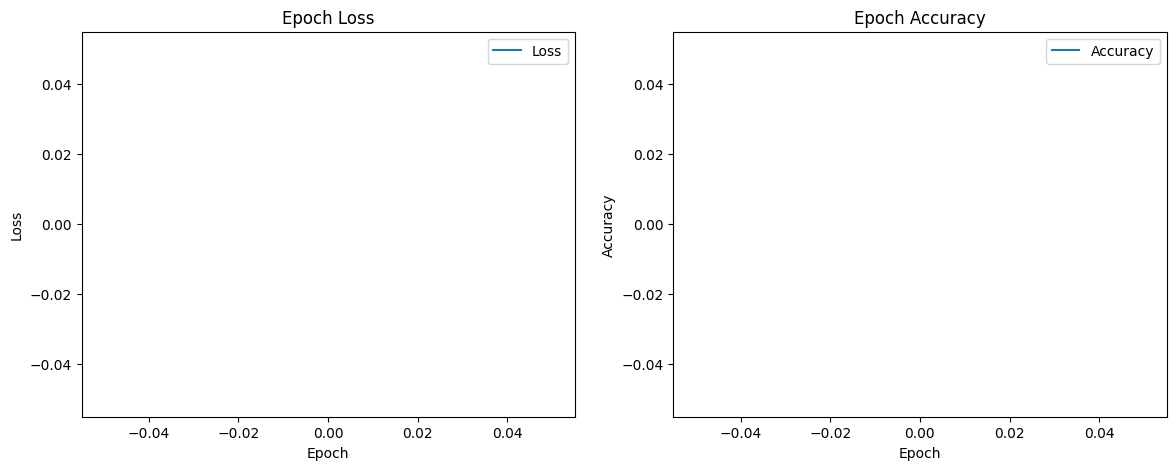

In [13]:
import matplotlib.pyplot as plt

# Plotting epoch losses and accuracies
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history['epoch_loss'], label='Loss')
plt.title('Epoch Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['epoch_accuracy'], label='Accuracy')
plt.title('Epoch Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# You can add more plots for batch-level data, rewards, thresholds, etc.


In [ ]:
# # for later check
# agent = Agent(pn_model, alpha=0.00001, gamma=0.99)
# # Example parameters
# n_epochs = 300
# n_epochs = 10
# batch_size = 128 # You can adjust the batch size as needed

# def shuffle_data(x_train, y_train, s):
#     indices = np.arange(len(x_train))
#     np.random.shuffle(indices)
#     return x_train[indices], y_train[indices], s[indices]

# def create_mini_batches(x_train, y_train, s, batch_size):
#     for start_idx in range(0, len(x_train) - batch_size + 1, batch_size):
#         excerpt = slice(start_idx, start_idx + batch_size)
#         yield x_train[excerpt], y_train[excerpt], s[excerpt]

# def calculate_threshold(clf_probabilities, y_batch):
#     # Identify indices of positive examples
#     positive_indices = (y_batch == 1)
    
#     # Calculate threshmin from positive examples
#     if np.any(positive_indices):
#         threshmin = np.min(clf_probabilities[positive_indices])
#     else:
#         threshmin = 0  # Default value if no positive examples are present

#     # Identify U0 - samples with predictions >= threshmin
#     U0_indices = (clf_probabilities >= threshmin)
    
#     # Calculate the final threshold using Equation 5
#     if np.any(U0_indices):
#         threshold = np.mean(clf_probabilities[U0_indices])
#     else:
#         threshold = threshmin  # Use threshmin if no samples meet the U0 criteria

#     return threshold


# for epoch in range(1, n_epochs + 1):
#     x_train_shuffled, y_train_shuffled, s_shuffled = shuffle_data(x_train, y_train, s)
    
#     for x_batch, y_batch, s_batch in create_mini_batches(x_train_shuffled, y_train_shuffled, s_shuffled, batch_size):
#         # 
#         probabilities = pn_model.predict(x_batch)
#         # print(f"Probabilities = {probabilities}")
#         threshold = min(probabilities[y_batch == 1])
#         print(f"Threshold = {threshold}")
#         predicted_labels = (probabilities >= threshold).astype(int)
#         pn_predicted_labels = predicted_labels.flatten().astype(int)

#         # actions = policy_network.predict_action(x_batch)

#         actions = []
#         probabilities = []
#         for x in x_batch:
#             action, probability  = agent.choose_action(x)
#             actions.append(action)
#             probabilities.append(probability)

#         actions = np.array(actions)

#         # Check shapes before training to debug
#         # if pn_predicted_labels.ndim > 1:
#         #     pn_predicted_labels = np.squeeze(pn_predicted_labels)
#         print(f"x_batch shape: {x_batch.shape}")
#         print(f"actions shape: {pn_predicted_labels.shape}")
#         print(f"Action: {pn_predicted_labels}" )
#         # Ensuring that pn_predicted_labels is a flat numpy array, not a numpy array of objects or something else
#         # if isinstance(pn_predicted_labels, list):
#         #     pn_predicted_labels = np.array(pn_predicted_labels)
#         # elif isinstance(pn_predicted_labels, np.ndarray) and pn_predicted_labels.dtype == object:
#         #     pn_predicted_labels = np.concatenate(pn_predicted_labels)

#         # Redundant reshaping to ensure compatibility
#         # pn_predicted_labels = pn_predicted_labels.reshape(-1)
#         # print(f"actions shape 2: {pn_predicted_labels.shape}")



#         # now train classifier on policy network predicted label
#         # history_1 = model_1.fit(x_batch, pn_predicted_labels, epochs=1, batch_size=len(x_batch), validation_split=0.2)
#         history_1 = model_1.fit(x_batch, actions, epochs=1, batch_size=len(x_batch), validation_split=0.2)
#         clf_probabilities = model_1.predict(x_batch)
#         # threshold = min(clf_probabilities[y_batch == 1])
#         threshold = calculate_threshold(clf_probabilities, y_batch)
#         # clf_predicted_labels = (clf_probabilities >= threshold).astype(int)
#         # clf_predicted_labels = clf_predicted_labels.flatten().astype(int)
#         # Calculate rewards based on the threshold
#         rewards = []
#         for prob, actual in zip(clf_probabilities, y_batch):
#             if actual == 1 or (actual == 0 and prob >= threshold):
#                 reward = prob
#             else:
#                 reward = 1 - prob
#             rewards.append(reward)

#         # Store transitions and learn from them
#         # for state, action, reward in zip(x_batch, actions, rewards):
#         for state, action, reward in zip(x_batch, pn_predicted_labels, rewards):
#             agent.store_transition(state, action, reward)
#         agent.learn()
#         print("Agent learned")
        

        
#         pass
    
#     if epoch % 3 == 0:  # Every 3 epochs
#         print("Call learn policy here!")

In [ ]:
import gym
# if __name__ == '__main__':
agent = Agent(alpha=0.0005, gamma=0.99, model=pn_model)

# env = gym.make('LunarLander-v2')
score_history = []

num_episodes = 10 #2000

for i in range(num_episodes):
    done = False
    score = 0
    observation = env.reset()
    print(f"Obeservation: {observation}")
    while not done:
        action = agent.choose_action(observation)
        # observation_, reward, done, info = env.step(action)
        observation_, predictid_label, done, info = env.step(action)
        agent.store(observation, action, reward)
        observation = observation_
        score += reward
    score_history.append(score)

    agent.learn()
    avg_score = np.mean(score_history[-100:])
    print('episode: ', i,'score: %.1f' % score,
        'average score %.1f' % avg_score)

In [ ]:
# loop here
for epoch in range(10):
    
    probabilities = pn_model.predict(x_train)
    threshold = min(probabilities[y_train == 1])

    # Convert probabilities to binary labels based on the threshold
    threshold =0.5
    predicted_labels = (probabilities >= threshold).astype(int)
    policy_predicted_labels = predicted_labels.flatten().astype(int)

    print(f"Policy predicted labels distribution: {epoch}", np.bincount(policy_predicted_labels))

    history_1 = model_1.fit(x_train, policy_predicted_labels, epochs=5, batch_size=32, validation_split=0.2)
    probabilities = pn_model.predict(x_train)
    threshold = min(probabilities[y_train == 1])
    predicted_labels = (probabilities >= threshold).astype(int)
    clf_predicted_labels = predicted_labels.flatten().astype(int)
    print(f"Classifer predicted labels distribution: {epoch}", np.bincount(clf_predicted_labels))





    


# Visual

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images(images, labels, predictions=None):
    """Plot images with their labels. Show predictions if provided."""
    n = images.shape[0]
    sqrt_val = int(np.ceil(np.sqrt(n)))
    fig, axes = plt.subplots(sqrt_val, sqrt_val, figsize=(10, 10))
    
    for i, ax in enumerate(axes.flat):
        if i >= n:
            break
        ax.imshow(images[i], cmap='binary')
        
        if predictions is not None:
            ax.set_title(f"True: {labels[i]}\nPred: {predictions[i]}")
        else:
            ax.set_title(f"Label: {labels[i]}")
        
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

# Predictions from the second classifier
predictions = model_2.predict(X_test_reshaped)
predicted_classes = (predictions > 0.5).astype(int).flatten()  # Assuming binary classification

# Selecting a few images to display
indices = np.random.choice(range(len(x_test)), 25, replace=False)  # Randomly select 25 images
selected_images = x_test[indices]
selected_labels = y_test[indices]
selected_predictions = predicted_classes[indices]

# Plotting
plot_images(selected_images, selected_labels, selected_predictions)


In [ ]:
def plot_history(history):
    """Plot training and validation loss and accuracy."""
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))
    axs[0].plot(history.history['loss'], label='train')
    axs[0].plot(history.history['val_loss'], label='validation')
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend()

    axs[1].plot(history.history['accuracy'], label='train')
    axs[1].plot(history.history['val_accuracy'], label='validation')
    axs[1].set_title('Accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()

    plt.show()

# Assuming you have stored the history of training your models as `history_1` and `history_2`
plot_history(history_1)  # For the first classifier
plot_history(history_2)  # For the second classifier
